# Twin-T Variations v1
Last update: 1 April 2025  
> $\large{\color {red} {\text{Note}}}$  
> This notebook is an early draft and is posted as a placeholder  
> The narrative and calculations are very preliminary  
> Spelling and grammar checks have not been completed  

# Introduction
Variations on the Twin-T filter topology

ToDo  

1 April 2025: Saving v0, saving as version to v1, removing some variations, addin6 code from Twin-T_network_experiment.ipynb

- 28 Mar: LP and HP variations not working. 
- Look at HP and LP transfer function polys, what is their form?
- trim number of variations, file taking a long time to load
- write narrative
- swap a and b for num and denominator coef to make same as SciPy filter 
- moved investigation of LP and HP to Twin-T_network_experiment.ipynb
- LP and HP Twin-T variations are really the same filter with different C4 and R4 values. Make new section called Twin-T variation #1, then design LP and HP from that structure. 
- remove BP since this is covered in the main paper
- Fix up all pass variations

| Variation | Description |
|---|---|
| LP | input connection is at R1, C1 is gnd, remove |
| HP | input connection is at C1, R1 is gnd, remove |
| BR | |
| All Pass | used two Op Amps |
| 1 | orginal BPF |
| 2 | works as an integrator |
| 3 | kind of a low pass |
| 5 | Variation 5 moved to 3 port analysis |
| 6 | Using R4 produces a High pass filter<br>replace with a capacitor - produces a Low Pass |
| 7 | HP, R4 replaced by C produces a low pass, looks better than the other variations |  
| 8 | Op Amp config as non-inv, symbolic solution took too long |
| 9 | symbolic solution took too long |
| 10 | Trying to make a one Op Amp all pass, constant gain with a peak<br>With R4 = resistor - High pass<br>with R4 = capacitor - Low Pass<br>with R1= Cap & C1=Res - low pass with constant high freq gain<br>same but with R4=R - high pass with constant low freq gain<br>R4=ind - high pass |
| 10a | Twin-T network appled to non-inverting, works somewhat like an all pass with a dip in the response |
| 10b | all pass version |

# References

Organize into LP, HP, BP, BR, AP, integrator, differentiator

In [1]:
import random
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

In [2]:
#import numpy as np
#from scipy import signal
#from sympy import *
#import matplotlib.pyplot as plt
#init_printing()

In [3]:
C, R = symbols('C R')

## Low Pass Filter Variations

generally more poles than zeros,

Poles are to the left of the zeros, no zero at origin, but complex zeros are can be on the imaginary axis


Circuit configuration should support DC path from inout to output

An elliptic filter, also known as a Cauer filter, is a type of signal processing filter that's known for its steep transition between the passband (the frequencies it allows to pass) and the stopband (the frequencies it blocks). Here's a breakdown of its key characteristics:

* **Equiripple Behavior:**
    * A defining feature of elliptic filters is that they exhibit "equiripple" behavior in both the passband and the stopband. This means that the amount of variation (ripple) in the signal's amplitude is evenly distributed within those bands.
* **Sharp Cutoff:**
    * Elliptic filters provide the sharpest transition from the passband to the stopband compared to other common filter types (like Butterworth or Chebyshev filters) of the same order. This makes them highly efficient when a very precise frequency selection is required.
* **Trade-offs:**
    * While they offer superior sharpness, elliptic filters come with the trade-off of having ripple in both the passband and the stopband. Other filter types may prioritize a flat passband or a monotonic stopband.
* **Applications:**
    * Elliptic filters are used in applications where a very selective frequency response is crucial, such as:
        * Telecommunications
        * Audio signal processing
        * Digital signal processing
        * Where very sharp frequency selection is needed.

In essence, an elliptic filter is a powerful tool for achieving a very precise frequency cutoff, at the cost of some ripple in the signal's amplitude.

Do the polynominals form elliptic functions?

positive feed back to the twin-t network.

Other types, such as the DABP. biquad permit adjustment of Q

some times bandpass and band reject are needed simultainioulsy to for applicications that involve seperation of signals. 

See figure 1.30 in ??, R2=2R1 and C2=2C1, then $fc= \frac {1}{2\pi RC}$

Polynomial filters with equiripples in the pass band (or reject band) and in which all the poles of attentation lie at infinity 

Roots of the characteristic function are situated in the complex plane on an ellipse. 

## Elliptic Filter
The circuit shown below is a section of the circuit from []. Characterized by ripple in the pass band, stop band or both. 

Ripple in the stop band

The filter contains zeros just outside the pass band and force nulls in the response.

Pair of imaginary zeros located at $\pm \omega$


The RC secyopm introduces a real pole at ??



Elliptic filters have the roots of the charasteristic polynomial that lay along an ellips in the complex frequency plane. Generally these types of filters have 

[Elliptic filter](https://en.wikipedia.org/wiki/Elliptic_filter)


An elliptic filter (also known as a Cauer filter, named after Wilhelm Cauer, or as a Zolotarev filter, after Yegor Zolotarev) is a signal processing filter with equalized ripple (equiripple) behavior in both the passband and the stopband. The amount of ripple in each band is independently adjustable, and no other filter of equal order can have a faster transition in gain between the passband and the stopband, for the given values of ripple (whether the ripple is equalized or not).[citation needed] Alternatively, one may give up the ability to adjust independently the passband and stopband ripple, and instead design a filter which is maximally insensitive to component variations.

As the ripple in the stopband approaches zero, the filter becomes a type I Chebyshev filter. As the ripple in the passband approaches zero, the filter becomes a type II Chebyshev filter and finally, as both ripple values approach zero, the filter becomes a Butterworth filter. 




[Elliptic function](https://en.wikipedia.org/wiki/Elliptic_function)

In the mathematical field of complex analysis, elliptic functions are special kinds of meromorphic functions, that satisfy two periodicity conditions. They are named elliptic functions because they come from elliptic integrals. Those integrals are in turn named elliptic because they first were encountered for the calculation of the arc length of an ellipse.

Important elliptic functions are Jacobi elliptic functions and the Weierstrass ℘ {\displaystyle \wp }-function.

Further development of this theory led to hyperelliptic functions and modular forms. 



Rename this section to: Elliptic function

#### Circuit Description


![Elliptic function circuit](LP4-Twin-T-Active-Filter.png)

In [4]:
example_net_list = '''
* LP4-Twin-T-Active-Filter.asc
R1 3 1 1
R2 5 0 1
*R2 5 2 1
R3 4 3 1
C1 5 1 1
C2 4 5 1
C3 2 3 1
O1 2 4 2
V1 1 0 1
R4 4 0 1
C4 4 0 1
'''

### Generate Network Equations and Symbolic Solution

In [5]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

# generate network equations
NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.lhs[i]),
        latex(NE_sym.rhs[i]))

Markdown(temp)

<p>$- C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}} = 0$</p><p>$C_{3} s v_{2} - C_{3} s v_{3} + I_{O1} = 0$</p><p>$- C_{3} s v_{2} + v_{3} \left(C_{3} s + \frac{1}{R_{3}} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{3}} - \frac{v_{1}}{R_{1}} = 0$</p><p>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + C_{4} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{3}}{R_{3}} = 0$</p><p>$- C_{1} s v_{1} - C_{2} s v_{4} + v_{5} \left(C_{1} s + C_{2} s + \frac{1}{R_{2}}\right) = 0$</p><p>$v_{1} = V_{1}$</p><p>$v_{2} - v_{4} = 0$</p>

### Solve the Network Equations

In [6]:
# creat the variable list and load component values into the dictionary
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# solve the equations
U_sym = solve(NE_sym,X)

# display the solution
temp = ''
for i in U_sym.keys():
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} R_{2} R_{4} V_{1} s + C_{2} R_{2} R_{4} V_{1} s + R_{4} V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p><p>$v_{3} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} R_{2} R_{3} V_{1} s + C_{1} R_{2} R_{4} V_{1} s + C_{2} C_{4} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{2} R_{2} R_{3} V_{1} s + C_{2} R_{2} R_{4} V_{1} s + C_{2} R_{3} R_{4} V_{1} s + C_{4} R_{3} R_{4} V_{1} s + R_{3} V_{1} + R_{4} V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p><p>$v_{4} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} R_{2} R_{4} V_{1} s + C_{2} R_{2} R_{4} V_{1} s + R_{4} V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} V_{1} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} V_{1} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} V_{1} s^{2} + C_{1} R_{1} R_{2} V_{1} s + C_{1} R_{2} R_{3} V_{1} s + C_{1} R_{2} R_{4} V_{1} s + C_{2} R_{2} R_{4} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p><p>$I_{V1} = \frac{- C_{1} C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} V_{1} s^{4} - C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} - C_{1} C_{2} C_{3} R_{1} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{2} C_{4} R_{1} R_{2} R_{4} V_{1} s^{3} - C_{1} C_{2} C_{4} R_{2} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} - C_{1} C_{2} R_{1} R_{4} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{3} R_{4} V_{1} s^{2} - C_{1} C_{3} C_{4} R_{1} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{3} C_{4} R_{2} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{4} R_{1} R_{4} V_{1} s^{2} - C_{1} C_{4} R_{2} R_{4} V_{1} s^{2} - C_{1} C_{4} R_{3} R_{4} V_{1} s^{2} - C_{1} R_{1} V_{1} s - C_{1} R_{2} V_{1} s - C_{1} R_{3} V_{1} s - C_{1} R_{4} V_{1} s - C_{2} C_{3} C_{4} R_{2} R_{3} R_{4} V_{1} s^{3} - C_{2} C_{3} R_{2} R_{3} V_{1} s^{2} - C_{2} C_{3} R_{3} R_{4} V_{1} s^{2} - C_{2} C_{4} R_{2} R_{4} V_{1} s^{2} - C_{2} R_{2} V_{1} s - C_{2} R_{4} V_{1} s - C_{3} C_{4} R_{3} R_{4} V_{1} s^{2} - C_{3} R_{3} V_{1} s - C_{4} R_{4} V_{1} s - V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p><p>$I_{O1} = \frac{C_{1} C_{3} C_{4} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{3} V_{1} s^{2} + C_{2} C_{3} C_{4} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{2} C_{3} R_{2} R_{3} V_{1} s^{2} + C_{2} C_{3} R_{3} R_{4} V_{1} s^{2} + C_{3} C_{4} R_{3} R_{4} V_{1} s^{2} + C_{3} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{2} R_{2} R_{3} R_{4} s^{2} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{1} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{1} R_{1} R_{2} s + C_{1} R_{2} R_{3} s + C_{1} R_{2} R_{4} s + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} s^{3} + C_{2} C_{3} R_{1} R_{2} R_{3} s^{2} + C_{2} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{2} C_{4} R_{1} R_{2} R_{4} s^{2} + C_{2} C_{4} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{1} R_{2} s + C_{2} R_{1} R_{4} s + C_{2} R_{2} R_{3} s + C_{2} R_{2} R_{4} s + C_{2} R_{3} R_{4} s + C_{3} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{3} R_{1} R_{3} s + C_{4} R_{1} R_{4} s + C_{4} R_{3} R_{4} s + R_{1} + R_{3} + R_{4}}$</p>

### Voltage Transfer Function 

In [7]:
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + R_{4} + s^{2} \left(C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4}\right) + s \left(C_{1} R_{2} R_{4} + C_{2} R_{2} R_{4}\right)}{R_{1} + R_{3} + R_{4} + s^{3} \left(C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4}\right) + s^{2} \left(C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4} + C_{1} C_{3} R_{1} R_{2} R_{3} + C_{1} C_{4} R_{1} R_{2} R_{4} + C_{1} C_{4} R_{2} R_{3} R_{4} + C_{2} C_{3} R_{1} R_{2} R_{3} + C_{2} C_{3} R_{1} R_{3} R_{4} + C_{2} C_{4} R_{1} R_{2} R_{4} + C_{2} C_{4} R_{2} R_{3} R_{4} + C_{3} C_{4} R_{1} R_{3} R_{4}\right) + s \left(C_{1} R_{1} R_{2} + C_{1} R_{2} R_{3} + C_{1} R_{2} R_{4} + C_{2} R_{1} R_{2} + C_{2} R_{1} R_{4} + C_{2} R_{2} R_{3} + C_{2} R_{2} R_{4} + C_{2} R_{3} R_{4} + C_{3} R_{1} R_{3} + C_{4} R_{1} R_{4} + C_{4} R_{3} R_{4}\right)}$

In [8]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynominal

rename coef of numerator as a's and denominator as b's

 where are elements of the numerator num, are elements of the denominator den, 


where b's are elements of the numerator

a's are elements of the demonator


The numerator polynominal is:

In [9]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + R_{4} + s^{2} \left(C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4}\right) + s \left(C_{1} R_{2} R_{4} + C_{2} R_{2} R_{4}\right)$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_3s^{3}+b_2s^{2}+b_1s+b_0$

where $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [10]:
b3 = H_sym_num.coeff(s**3)
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2 - b3*s**3

Markdown('<p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4}$</p><p>$b_2=C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4}$</p><p>$b_1=C_{1} R_{2} R_{4} + C_{2} R_{2} R_{4}$</p><p>$b_0=R_{4}$</p>

### Denominator Polynominal

In [11]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=R_{1} + R_{3} + R_{4} + s^{3} \left(C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4}\right) + s^{2} \left(C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4} + C_{1} C_{3} R_{1} R_{2} R_{3} + C_{1} C_{4} R_{1} R_{2} R_{4} + C_{1} C_{4} R_{2} R_{3} R_{4} + C_{2} C_{3} R_{1} R_{2} R_{3} + C_{2} C_{3} R_{1} R_{3} R_{4} + C_{2} C_{4} R_{1} R_{2} R_{4} + C_{2} C_{4} R_{2} R_{3} R_{4} + C_{3} C_{4} R_{1} R_{3} R_{4}\right) + s \left(C_{1} R_{1} R_{2} + C_{1} R_{2} R_{3} + C_{1} R_{2} R_{4} + C_{2} R_{1} R_{2} + C_{2} R_{1} R_{4} + C_{2} R_{2} R_{3} + C_{2} R_{2} R_{4} + C_{2} R_{3} R_{4} + C_{3} R_{1} R_{3} + C_{4} R_{1} R_{4} + C_{4} R_{3} R_{4}\right)$

The coeficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [12]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4} + C_{2} C_{3} C_{4} R_{1} R_{2} R_{3} R_{4}$</p><p>$a_2=C_{1} C_{2} R_{1} R_{2} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4} + C_{1} C_{3} R_{1} R_{2} R_{3} + C_{1} C_{4} R_{1} R_{2} R_{4} + C_{1} C_{4} R_{2} R_{3} R_{4} + C_{2} C_{3} R_{1} R_{2} R_{3} + C_{2} C_{3} R_{1} R_{3} R_{4} + C_{2} C_{4} R_{1} R_{2} R_{4} + C_{2} C_{4} R_{2} R_{3} R_{4} + C_{3} C_{4} R_{1} R_{3} R_{4}$</p><p>$a_1=C_{1} R_{1} R_{2} + C_{1} R_{2} R_{3} + C_{1} R_{2} R_{4} + C_{2} R_{1} R_{2} + C_{2} R_{1} R_{4} + C_{2} R_{2} R_{3} + C_{2} R_{2} R_{4} + C_{2} R_{3} R_{4} + C_{3} R_{1} R_{3} + C_{4} R_{1} R_{4} + C_{4} R_{3} R_{4}$</p><p>$a_0=R_{1} + R_{3} + R_{4}$</p>

### Simplification
{R1:1, R2:1/2, R3:1, R4:10, C1:1, C2:1, C3:2, C4:16}

This came from noticing that Twin-T implementation usually had this arrangemet. 

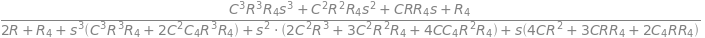

In [13]:
# various simplification options
sub_values = {R1:R, R2:R/2, R3:R, C1:C, C2:C, C3:C*2} # seems to generate the simplest expressions for poles and zeros
#sub_values = {R1:2*R, R2:R, R3:2*R, C1:C, C2:C, C3:C*2} # this works but puts /2 in the expression
#sub_values = {R1:R, R2:R, R3:R, C1:C, C2:C, C3:C} # complicated demoninator roots
#sub_values = {R1:R, R2:R/4, R3:R, C1:C, C2:C, C3:C*4} # produces complicated denomiator
#sub_values = {R1:R, R2:R, R3:R, C1:C, C2:C, C3:C*2}

H_sym_simplified = H_sym.subs(sub_values)
H_sym_simplified

In [14]:
H_sym_num, H_sym_denom = fraction(H_sym_simplified,s) #returns numerator and denominator

In [15]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C^{3} R^{3} R_{4} s^{3} + C^{2} R^{2} R_{4} s^{2} + C R R_{4} s + R_{4}$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_3s^{3}+b_2s^{2}+b_1s+b_0$

where $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [16]:
b3 = H_sym_num.coeff(s**3)
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2 - b3*s**3

Markdown('<p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_3=C^{3} R^{3} R_{4}$</p><p>$b_2=C^{2} R^{2} R_{4}$</p><p>$b_1=C R R_{4}$</p><p>$b_0=R_{4}$</p>

In [17]:
solve(H_sym_num,s)

In [18]:
H_sym_num.factor(s)

### Denominator Polynominal

In [19]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=2 R + R_{4} + s^{3} \left(C^{3} R^{3} R_{4} + 2 C^{2} C_{4} R^{3} R_{4}\right) + s^{2} \cdot \left(2 C^{2} R^{3} + 3 C^{2} R^{2} R_{4} + 4 C C_{4} R^{2} R_{4}\right) + s \left(4 C R^{2} + 3 C R R_{4} + 2 C_{4} R R_{4}\right)$

In [20]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),latex(a2),latex(a1),latex(a0)))

<p>$a_3=C^{3} R^{3} R_{4} + 2 C^{2} C_{4} R^{3} R_{4}$</p><p>$a_2=2 C^{2} R^{3} + 3 C^{2} R^{2} R_{4} + 4 C C_{4} R^{2} R_{4}$</p><p>$a_1=4 C R^{2} + 3 C R R_{4} + 2 C_{4} R R_{4}$</p><p>$a_0=2 R + R_{4}$</p>

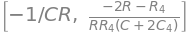

In [21]:
poles = solve(H_sym_denom,s)
poles

In [22]:
H_sym_denom.factor(s)

In [23]:
str(poles[1])

'(-2*R - R4)/(R*R4*(C + 2*C4))'

### Low Pass Design Example
Design for cut off of null at 1000 Hz

R4 and C4 need to be larger than R and C

From numerator roots above the zeros are complex and located at $\frac{1}{RC}$

In [24]:
C, R, R4 = symbols('C R R4')

In [25]:
null_freq = 1e3
C_value = 10e-9
R_value = solve(1/(R*C_value)-null_freq*2*np.pi, R)[0]

In [26]:
R_value

In [27]:
pole_freq = 0 #.0001
C4_value = 1e-6
R4_value = solve((2*R_value-R4)/(R_value*R4*(C_value + 2*C4_value)) - pole_freq*2*np.pi, R4)[0]

In [28]:
R4_value

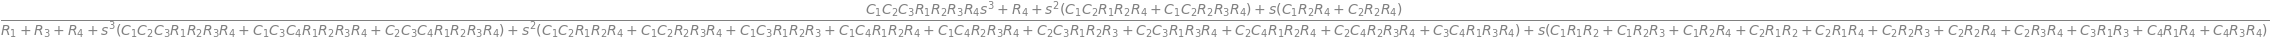

In [29]:
H_sym

In [30]:
sub_values = {R1:R_value, R2:R_value/2, R3:R_value, R4:R4_value, C1:C_value, C2:C_value, C3:C_value*2, C4:C4_value}
H = H_sym.subs(sub_values)

H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
an = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
bn = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(an,bn)

The poles and zeros of the transfer function are plotted below:

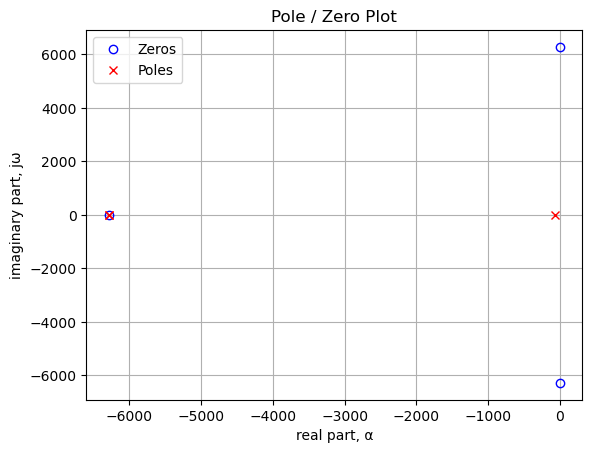

In [31]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [32]:
table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s        Poles, rad/s
------------------  ------------------
-6283.1853+0.0000j  -6283.1853+0.0002j
0.0000+6283.1853j   -6283.1853-0.0002j
0.0000-6283.1853j   -62.5193+0.0000j


The magnitude and phase of the filter's transfer function is plotted below.

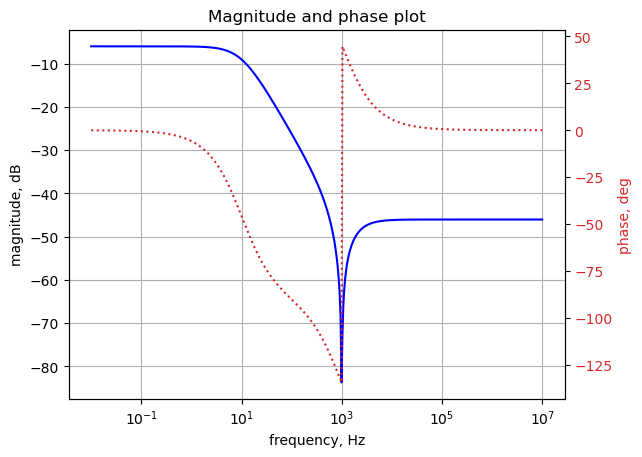

In [33]:
x = np.logspace(-2, 7, 500, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

### High Pass Design Example
Design for cut off of null at 1000 Hz

From numerator roots above the zeros are complex and located at $\frac{1}{RC}$

R4 and C4 needs to be smaller than R and C


In [34]:
C, R, R4 = symbols('C R R4')

In [35]:
null_freq = 1e3
C_value = 1e-6 #1e-9
R_value = solve(1/(R*C_value)-null_freq*2*np.pi, R)[0]

In [36]:
R_value

In [37]:
pole_freq = 20e3 #20e3
C4_value = 10e-9 #1e-12
R4_value = solve((2*R_value-R4)/(R_value*R4*(C_value + 2*C4_value)) - pole_freq*2*np.pi, R4)[0]

In [38]:
R4_value

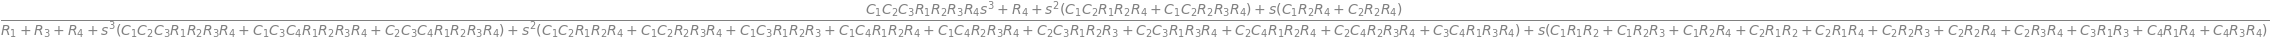

In [39]:
H_sym

In [40]:
sub_values = {R1:R_value, R2:R_value/2, R3:R_value, R4:R4_value, C1:C_value, C2:C_value, C3:C_value*2, C4:C4_value}
H = H_sym.subs(sub_values)

H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
an = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
bn = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(an,bn)

The poles and zeros of the transfer function are plotted below:

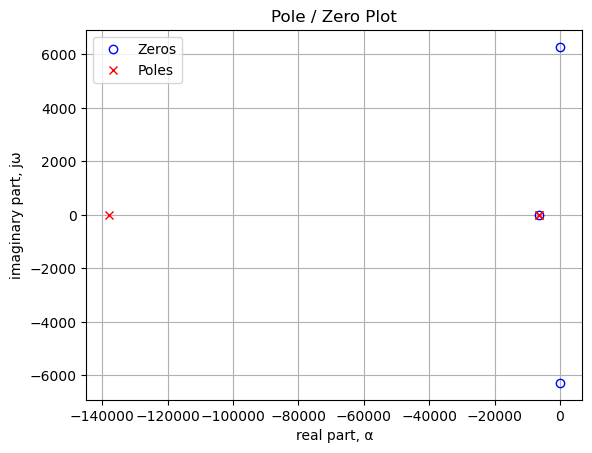

In [41]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [42]:
table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s        Poles, rad/s
------------------  --------------
-6283.1853+0.0000j  -137984
-0.0000+6283.1853j  -6283.19
-0.0000-6283.1853j  -6283.19


The magnitude and phase of the filter's transfer function is plotted below.

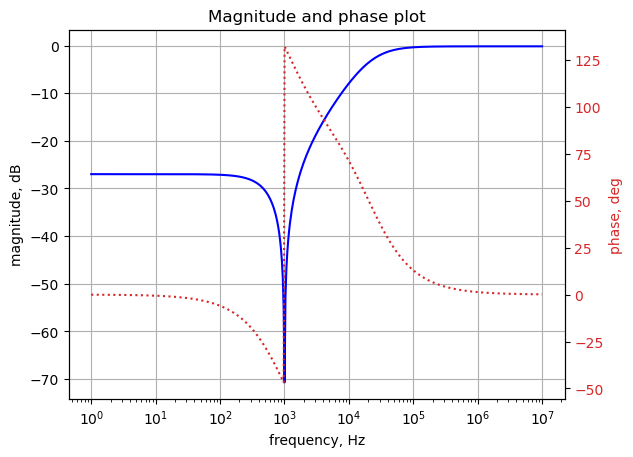

In [43]:
x = np.logspace(0, 7, 500, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

## Band Pass Filter Variations
Omit this section since it's the same circuit as in the main paper.  Or put the three port analysis here. 

### BP variation 1



![](Bandpass_Twin-T_Active_Filter.png)

Negative feed back to the twin-t network


```
* C:\users\jeff64\My Documents\JupyterLab\Misc ipython notebooks\Buchla 295 10 Channel Comb Filter\LTSpice\Bandpass-Twin-T-Active-Filter.asc
R1 3 1 15k
R2 4 5 186k
R3 2 5 15k
C1 5 1 10n
C2 4 3 910p
C3 2 3 10n
XU1 4 0 2 opamp Aol=100K GBW=10Meg
V1 1 0 PULSE(-1 1 1e-99 1e-99 1e-99 20m 40m) AC 1
* A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer
* 1000 Hz band
.lib opamp.sub
.ac dec 1000 100 10k
* R3 for each filter is a 20 kΩ potentiometer wired as a variable resistor.
* R2 for each filter consists of a fixed resistor in series with a 100 kΩ potentiometer wired as a variable resistor.
* The transfer function simplifies conveniently under the special case of R1 = R3 and C1 = C3
* .step param Rtone list 1k 2k 5k 10k
* ;.tran 0 60m 0
.backanno
.end
```

### Generate Network Equations and Symbolic Solution

In [44]:
example_net_list = '''
* Bandpass-Twin-T-Active-Filter.asc
R1 3 1 1
R2 4 5 1
R3 2 5 1
C1 5 1 1
C2 4 3 1
C3 2 3 1
O1 4 0 2
V1 1 0 1
'''

In [45]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

# generate network equations
NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.lhs[i]),
        latex(NE_sym.rhs[i]))

Markdown(temp)

<p>$- C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}} = 0$</p><p>$- C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$</p><p>$- C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$</p><p>$- C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$</p><p>$- C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}} = 0$</p><p>$v_{1} = V_{1}$</p><p>$v_{4} = 0$</p>

### Solve the Network Equations

In [46]:
# creat the variable list and load component values into the dictionary
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# solve the equations
U_sym = solve(NE_sym,X)

# display the solution
temp = ''
for i in U_sym.keys():
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} R_{3} V_{1} s - C_{2} R_{2} V_{1} s - C_{2} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{3} = \frac{- C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} - C_{2} R_{2} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$I_{V1} = \frac{- C_{1} C_{2} C_{3} R_{1} R_{2} V_{1} s^{3} - C_{1} C_{2} C_{3} R_{1} R_{3} V_{1} s^{3} - C_{1} C_{2} C_{3} R_{2} R_{3} V_{1} s^{3} - C_{1} C_{2} R_{1} V_{1} s^{2} - C_{1} C_{2} R_{2} V_{1} s^{2} - C_{1} C_{3} R_{1} V_{1} s^{2} - C_{1} C_{3} R_{3} V_{1} s^{2} - C_{1} V_{1} s - C_{2} C_{3} R_{2} V_{1} s^{2} - C_{2} C_{3} R_{3} V_{1} s^{2} - C_{2} V_{1} s - C_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$I_{O1} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} V_{1} s^{3} + C_{1} C_{2} C_{3} R_{1} R_{3} V_{1} s^{3} + C_{1} C_{2} C_{3} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} V_{1} s^{2} + C_{1} C_{2} R_{2} V_{1} s^{2} + C_{1} C_{3} R_{1} V_{1} s^{2} + C_{1} C_{3} R_{3} V_{1} s^{2} + C_{1} V_{1} s + C_{2} C_{3} R_{2} V_{1} s^{2} + C_{2} C_{3} R_{3} V_{1} s^{2} + C_{2} V_{1} s + C_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p>

### Voltage Transfer Function 

In [47]:
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1}$

In [48]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynominal
The numerator polynominal is:

In [49]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [50]:
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}$</p><p>$b_1=- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}$</p><p>$b_0=0$</p>

### Denominator Polynominal

In [51]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1$

The coeficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [52]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3), latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>$a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

### Reduced complexity

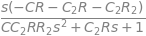

In [53]:
sub_values = {R1:R, R3:R, C1:C, C3:C}
H_sym_rc = H_sym.subs(sub_values).simplify()
H_sym_rc

Characteristic polynomial is 2nd order

In [54]:
H_sym_num, H_sym_denom = fraction(H_sym_rc) #returns numerator and denominator

In [55]:
a = H_sym_denom.coeff(s**2)
b = H_sym_denom.coeff(s**1)
c = H_sym_denom - b*s*1 - a*s**2
Markdown('<p>$a={:s}$</p><p>\
    $b={:s}$</p><p>$c={:s}$</p>'.format(latex(a),latex(b),latex(c)))

<p>$a=C C_{2} R R_{2}$</p><p>    $b=C_{2} R$</p><p>$c=1$</p>

In [56]:
omega_n, Q_factor = symbols('omega_n Q_factor')

In [57]:
omega_n = solve(omega_n**2 - c/a, omega_n)[1]
Markdown('$\omega_n = {:s}$'.format(latex(omega_n)))

$\omega_n = \sqrt{\frac{1}{C C_{2} R R_{2}}}$

In [58]:
Q_factor = solve(omega_n/Q_factor - b/a, Q_factor)[0]
Markdown('$Q = {:s}$'.format(latex(Q_factor)))

$Q = C R_{2} \sqrt{\frac{1}{C C_{2} R R_{2}}}$

### Design example
Design for $\omega_n=1000$

In [59]:
freq = 1e3 # Hz
C_value = 10e-9
R_value = 100e3
C2_value = 0.47e-9

In [60]:
R2_value = solve(omega_n.subs({R:R_value, C:C_value, C2:C2_value})-freq*2*np.pi, R2)[0]

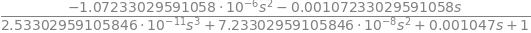

In [61]:
sub_values = {R1:R_value, R2:R2_value, R3:R_value, C1:C_value, C2:C2_value, C3:C_value}
H_sym.subs(sub_values)

In [62]:
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

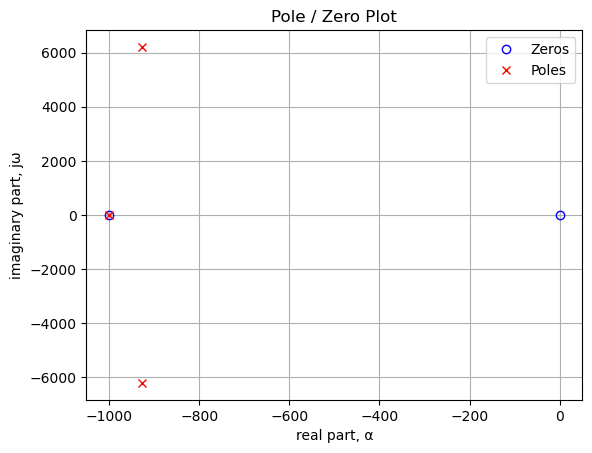

In [63]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [64]:
table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  ----------------
-1000.00        -927.74+6214.31j
0.00            -927.74-6214.31j
                -1000.00+0.00j


The magnitude and phase of the filter's transfer function is plotted below.

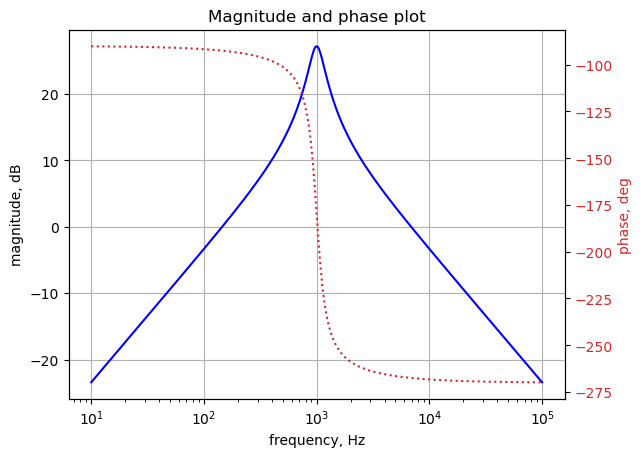

In [65]:
x = np.logspace(1, 5, 500, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

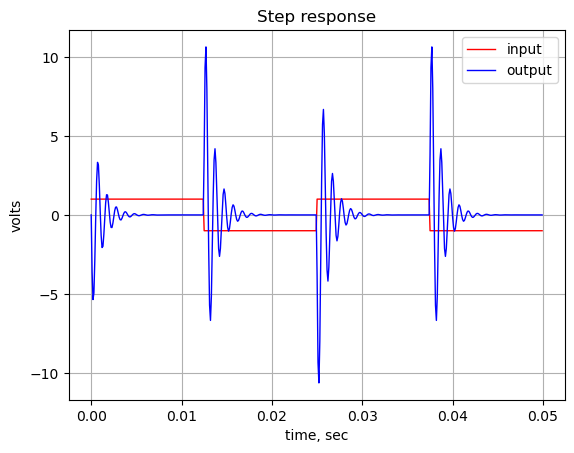

In [66]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 0.05, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*40*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Band Reject Filter Variations

### Circuit description


### BR variation 1



## BR
This Twin-T needs some work, ing gain at Dc and inf. Netlist changed to ground C3

![](BR3-Twin-T-Active-Filter.png)

In [67]:
example_net_list = '''
* BR3-Twin-T-Active-Filter.asc
R1 3 1 1
R2 4 3 1
R3 2 5 1
C1 5 1 1
C2 4 5 1
C3 0 3 1
O1 2 4 2
V1 1 0 1
'''

In [68]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

# generate network equations
NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.lhs[i]),
        latex(NE_sym.rhs[i]))

Markdown(temp)

<p>$- C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}} = 0$</p><p>$I_{O1} + \frac{v_{2}}{R_{3}} - \frac{v_{5}}{R_{3}} = 0$</p><p>$v_{3} \left(C_{3} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$</p><p>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$</p><p>$- C_{1} s v_{1} - C_{2} s v_{4} + v_{5} \left(C_{1} s + C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{2}}{R_{3}} = 0$</p><p>$v_{1} = V_{1}$</p><p>$v_{2} - v_{4} = 0$</p>

### Solve the Network Equations

In [69]:
# creat the variable list and load component values into the dictionary
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# solve the equations
U_sym = solve(NE_sym,X)

# display the solution
temp = ''
for i in U_sym.keys():
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} + C_{1} R_{3} V_{1} s + C_{2} R_{3} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p><p>$v_{3} = \frac{C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} + C_{1} R_{3} V_{1} s + C_{2} R_{3} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p><p>$v_{4} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} + C_{1} R_{3} V_{1} s + C_{2} R_{3} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} + C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} + C_{1} R_{3} V_{1} s + C_{2} R_{3} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p><p>$I_{V1} = \frac{- C_{1} C_{2} C_{3} R_{1} R_{3} V_{1} s^{3} - C_{1} C_{2} C_{3} R_{2} R_{3} V_{1} s^{3} - C_{1} C_{3} R_{1} V_{1} s^{2} - C_{1} C_{3} R_{3} V_{1} s^{2} - C_{2} C_{3} R_{3} V_{1} s^{2} - C_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p><p>$I_{O1} = \frac{C_{1} C_{3} R_{1} V_{1} s^{2}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{2} R_{2} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} R_{3} s + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{3} s + C_{3} R_{1} s + 1}$</p>

### Voltage Transfer Function 

In [70]:
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{3}\right) + 1}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{3} + C_{3} R_{1}\right) + 1}$

In [71]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynominal
The numerator polynominal is:

In [72]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{3}\right) + 1$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [73]:
b3 = H_sym_num.coeff(s**3)
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2 - b3*s**3

Markdown('<p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$b_2=C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3}$</p><p>$b_1=C_{1} R_{3} + C_{2} R_{3}$</p><p>$b_0=1$</p>

### Denominator Polynominal

In [74]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{3} + C_{3} R_{1}\right) + 1$

The coeficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [75]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3), latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} + C_{2} C_{3} R_{1} R_{3}$</p><p>$a_1=C_{1} R_{3} + C_{2} R_{3} + C_{3} R_{1}$</p><p>$a_0=1$</p>

### Design example
Design for $\omega_n=1000$

In [76]:
freq = 1e3 # Hz
C_value = 10e-9
R_value = 100e3
C2_value = 0.47e-9

In [77]:
R2_value

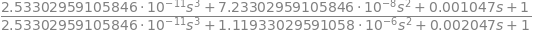

In [78]:
sub_values = {R1:R_value, R2:R2_value, R3:R_value, C1:C_value, C2:C2_value, C3:C_value}
H_sym.subs(sub_values)

In [79]:
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

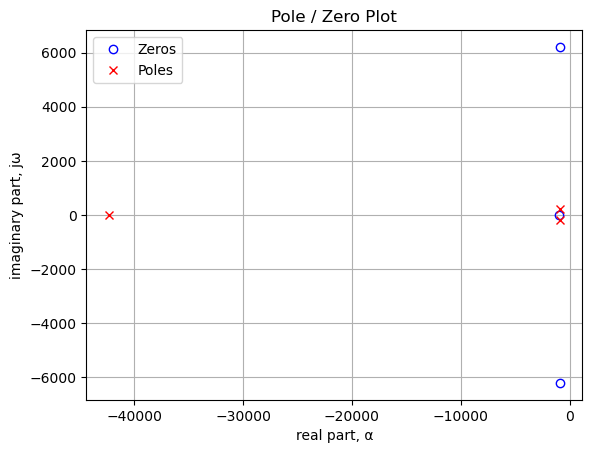

In [80]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [81]:
table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s      Poles, rad/s
----------------  ---------------
-927.74+6214.31j  -42301.04+0.00j
-927.74-6214.31j  -944.17+204.47j
-1000.00+0.00j    -944.17-204.47j


The magnitude and phase of the filter's transfer function is plotted below.

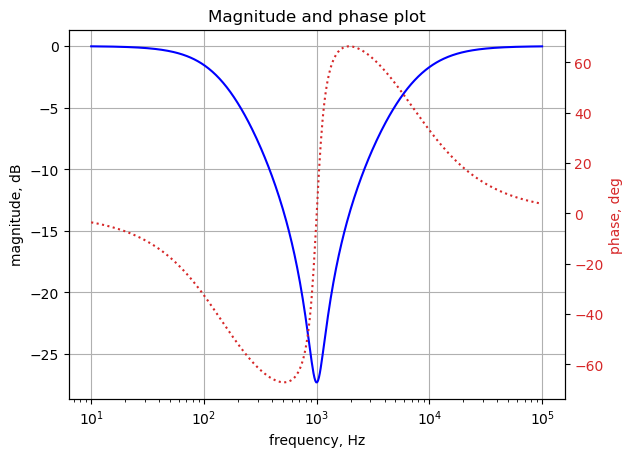

In [82]:
x = np.logspace(1, 5, 500, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

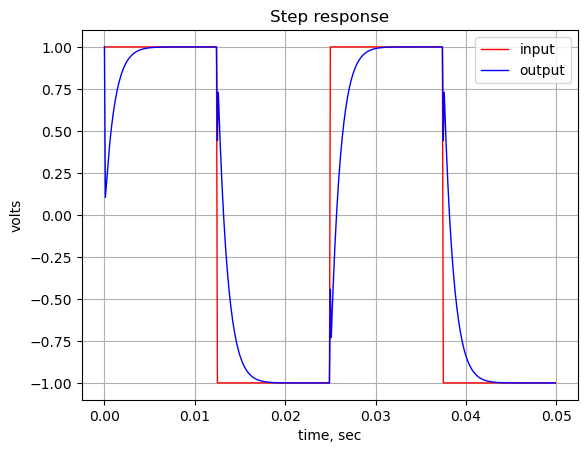

In [83]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 0.05, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*40*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## All Pass Filter Variations



### Example 4, $R_1=2R$, $R_2=R_3=R$, $C_1=C/2$ and $C_2=C_3=C$

#### Circuit Description


Move this example to variations notebook.

A special case of this passive filter, with 2R1 = R2 = R3 and C1/2 = C2 = C3 , appears as Figure 8.34(a) on p. 467 of [8], with pin 3 of that figure acting as the input and pin 2 acting as the output, where it is named “Bandpass Twin-T.” 

Terry Watson stumbled across the same special case in his master’s thesis work when he accidentally swapped connections to a standard Twin-T network (Figure 16 on p. 35 of [9], with Ē2 of that figure acting as the input and Ē1 acting as the output). He suggests it “might be used as a lead-lag compensating network,” but does not explore it futher.

[8] A. Sedra and P. Brackett, Filter Theory and Design: Active and Passive. Matrix Publications, 1978.  
[9] T. Watson, “Active band-pass filters using twin-tee networks,” Master’s thesis, University of Missouri at Rolla,, Rolla, MO, 1965.  

A lead-lag compensating network is a crucial component in control systems engineering, designed to enhance the performance and stability of a system. Here's a breakdown of what it is:

**Core Concept:**

* A lead-lag compensator combines the characteristics of both lead and lag compensators. This allows it to address both transient and steady-state response issues within a control system.
* Essentially, it's an electrical network that introduces both phase lead and phase lag at different frequency ranges.

**Purpose:**

* **Improving Stability:**
    * It helps increase stability margins, making the system more robust against disturbances.
* **Enhancing Transient Response:**
    * The phase lead component contributes to a faster response, reducing settling times and overshoot.
* **Improving Steady-State Accuracy:**
    * The phase lag component enhances low-frequency gain, minimizing steady-state errors.

**Key Components and Functionality:**

* **Lead Compensator:**
    * Provides phase lead at higher frequencies, improving transient response and stability.
* **Lag Compensator:**
    * Introduces phase lag at lower frequencies, enhancing steady-state accuracy.
* **Combined Effect:**
    * By combining these, a lead-lag compensator offers a balanced approach to optimizing system performance.

**In essence:**

Lead-lag compensators are versatile tools in control systems, allowing engineers to fine-tune system behavior for optimal performance across a wide range of operating conditions.


### AP variation 1

![](Twin-T-variation4.png)

In [84]:
example_net_list = '''
* Twin-T-variation4.asc
R1 3 1 1
R2 4 5 1
R3 6 5 1
C1 5 1 1
C2 4 3 1
C3 6 3 1
V1 1 0 1
O1 4 0 6
O2 7 0 2
R4 7 6 1
R5 7 1 1
R6 2 7 1
'''

In [85]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

U_sym = solve(NE_sym,X)
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

In [86]:
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{- C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{6} s^{3} - R_{4} R_{6} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} R_{5} R_{6} + C_{1} C_{2} R_{2} R_{3} R_{5} R_{6} + C_{1} C_{3} R_{1} R_{3} R_{5} R_{6} - C_{2} C_{3} R_{1} R_{2} R_{4} R_{6} - C_{2} C_{3} R_{1} R_{3} R_{4} R_{6}\right) + s \left(C_{1} R_{3} R_{5} R_{6} - C_{2} R_{1} R_{4} R_{6} + C_{2} R_{2} R_{5} R_{6} + C_{2} R_{3} R_{5} R_{6} - C_{3} R_{1} R_{4} R_{6}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{5} s^{3} + R_{4} R_{5} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} R_{4} R_{5} + C_{2} C_{3} R_{1} R_{3} R_{4} R_{5}\right) + s \left(C_{2} R_{1} R_{4} R_{5} + C_{3} R_{1} R_{4} R_{5}\right)}$

In [87]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynominal
The numerator polynominal is:

In [88]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=- C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{6} s^{3} - R_{4} R_{6} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} R_{5} R_{6} + C_{1} C_{2} R_{2} R_{3} R_{5} R_{6} + C_{1} C_{3} R_{1} R_{3} R_{5} R_{6} - C_{2} C_{3} R_{1} R_{2} R_{4} R_{6} - C_{2} C_{3} R_{1} R_{3} R_{4} R_{6}\right) + s \left(C_{1} R_{3} R_{5} R_{6} - C_{2} R_{1} R_{4} R_{6} + C_{2} R_{2} R_{5} R_{6} + C_{2} R_{3} R_{5} R_{6} - C_{3} R_{1} R_{4} R_{6}\right)$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_3s^{3}+b_2s^{2}+b_1s+b_0$

where $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [89]:
b3 = H_sym_num.coeff(s**3)
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2 - b3*s**3

Markdown('<p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_3=- C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{6}$</p><p>$b_2=C_{1} C_{2} R_{1} R_{3} R_{5} R_{6} + C_{1} C_{2} R_{2} R_{3} R_{5} R_{6} + C_{1} C_{3} R_{1} R_{3} R_{5} R_{6} - C_{2} C_{3} R_{1} R_{2} R_{4} R_{6} - C_{2} C_{3} R_{1} R_{3} R_{4} R_{6}$</p><p>$b_1=C_{1} R_{3} R_{5} R_{6} - C_{2} R_{1} R_{4} R_{6} + C_{2} R_{2} R_{5} R_{6} + C_{2} R_{3} R_{5} R_{6} - C_{3} R_{1} R_{4} R_{6}$</p><p>$b_0=- R_{4} R_{6}$</p>

### Denominator Polynominal

In [90]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{5} s^{3} + R_{4} R_{5} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} R_{4} R_{5} + C_{2} C_{3} R_{1} R_{3} R_{4} R_{5}\right) + s \left(C_{2} R_{1} R_{4} R_{5} + C_{3} R_{1} R_{4} R_{5}\right)$

The coeficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [91]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3), latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} R_{5}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} R_{4} R_{5} + C_{2} C_{3} R_{1} R_{3} R_{4} R_{5}$</p><p>$a_1=C_{2} R_{1} R_{4} R_{5} + C_{3} R_{1} R_{4} R_{5}$</p><p>$a_0=R_{4} R_{5}$</p>

In [92]:
sub_values = {R1:1, R2:2, R3:1, C1:1, C2: 1/2, C3:1}

Solving to get equal coefficients:  

set s^3 and s^0 terms of num and denom equal and solve for R5 and R6.  
The solution below says that R5=R6 and 

In [93]:
solve(((a3+b3).subs(sub_values),(a0+b0).subs(sub_values)),(R5,R6))

In [94]:
solve((a2-b2).subs(sub_values),(R4))[0].subs({R5:1,R6:1})

The solution above says that R4= 0.8333

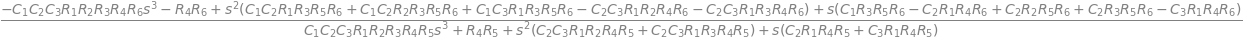

In [95]:
H_sym

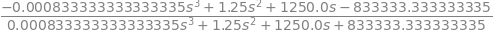

In [96]:
#sub_values = {R1:R_value, R2:R_value*2, R3:R_value, R4:5e3, R5:2e3, R6:2e3, C1:C_value, C2:C_value/2, C3:C_value}
sub_values = {R1:R_value, R2:R_value*2, R3:R_value, R4:0.833333333333335e3, R5:1e3, R6:1e3, C1:C_value, C2:C_value/2, C3:C_value}
H_sym.subs(sub_values)

But this is not what we want, we want equal roots, not coefficients

Making the substitutions: $R_1=R_3=R$, $R_2=2R$, $C_1=C_3=C$ and $C_2=C/2$, we get:

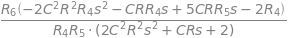

In [97]:
H_sym.subs({R1:R, R2:R*2, R3:R, C1:C, C2:C/2, C3:C}).simplify()

In [98]:
H_sym = H_sym.subs({R1:R, R2:R*2, R3:R, C1:C, C2:C/2, C3:C}).simplify()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{R_{6} \left(- 2 C^{2} R^{2} R_{4} s^{2} - C R R_{4} s + 5 C R R_{5} s - 2 R_{4}\right)}{R_{4} R_{5} \cdot \left(2 C^{2} R^{2} s^{2} + C R s + 2\right)}$

In [99]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

The numerator polynominal is:

In [100]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=R_{6} \left(- 2 C^{2} R^{2} R_{4} s^{2} - C R R_{4} s + 5 C R R_{5} s - 2 R_{4}\right)$

In [101]:
num_root_sym = solve(H_sym_num.expand(),s)
Markdown('${:s}$'.format(latex(num_root_sym)))

$\left[ \frac{- \frac{R_{4}}{4} + \frac{5 R_{5}}{4} - \frac{\sqrt{- 15 R_{4}^{2} - 10 R_{4} R_{5} + 25 R_{5}^{2}}}{4}}{C R R_{4}}, \  \frac{- \frac{R_{4}}{4} + \frac{5 R_{5}}{4} + \frac{\sqrt{- 15 R_{4}^{2} - 10 R_{4} R_{5} + 25 R_{5}^{2}}}{4}}{C R R_{4}}\right]$

The denominator polynominal is:

In [102]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom.expand())))

$D(s)=2 C^{2} R^{2} R_{4} R_{5} s^{2} + C R R_{4} R_{5} s + 2 R_{4} R_{5}$

The roots of the denominator polynominal can found with SymPy.

In [103]:
denom_root_sym = solve(H_sym_denom.expand(),s)
Markdown('${:s}$'.format(latex(denom_root_sym)))

$\left[ \frac{-1 - \sqrt{15} i}{4 C R}, \  \frac{-1 + \sqrt{15} i}{4 C R}\right]$

Rebuild equations.

In [104]:
H_sym = H_sym.subs({R1:R, R2:R*2, R3:R, C1:C, C2:C/2, C3:C, R4:5, R5:2, R6:2}).simplify()

In [105]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

In [106]:
H_sym_denom

In [107]:
a = H_sym_denom.coeff(s**2)
b = H_sym_denom.coeff(s**1)
c = H_sym_denom - b*s*1 - a*s**2
Markdown('<p>$a={:s}$</p><p>\
    $b={:s}$</p><p>$c={:s}$</p>'.format(latex(a),latex(b),latex(c)))

<p>$a=2 C^{2} R^{2}$</p><p>    $b=C R$</p><p>$c=2$</p>

In [108]:
omega_n, Q_factor = symbols('omega_n Q_factor')

In [109]:
omega_n = solve(omega_n**2 - c/a, omega_n)[1]
Markdown('$\omega_n = {:s}$'.format(latex(omega_n)))

$\omega_n = \frac{1}{C R}$

In [110]:
Q_factor = solve(omega_n/Q_factor - b/a, Q_factor)[0]
Markdown('$Q = {:s}$'.format(latex(Q_factor)))

$Q = 2$

### Design example
Design for $\omega_n=1000$

In [111]:
freq = 1e3 # Hz
C_value = 10e-9

In [112]:
R_value = solve(omega_n.subs({C:C_value})-freq*2*np.pi, R)[0]

In [113]:
R_value

rebuild H(s)

In [114]:
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

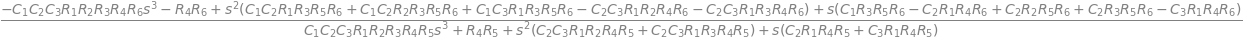

In [115]:
H_sym

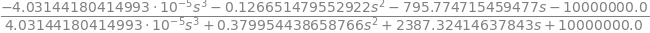

In [116]:
sub_values = {R1:R_value, R2:R_value*2, R3:R_value, R4:5e3, R5:2e3, R6:2e3, C1:C_value, C2:C_value/2, C3:C_value}
#sub_values = {R1:R_value, R2:R_value*2, R3:R_value, R4:0.833333333333335e3, R5:1e3, R6:1e3, C1:C_value, C2:C_value/2, C3:C_value}
H_sym.subs(sub_values)

In [117]:
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

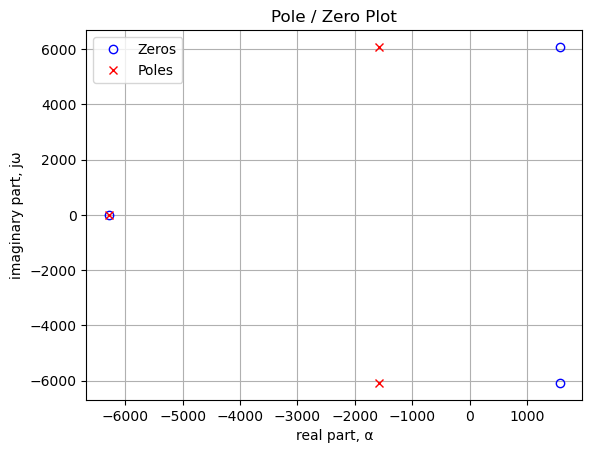

In [118]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [119]:
table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s      Poles, rad/s
----------------  -----------------
1570.80+6083.67j  -6283.19+0.00j
1570.80-6083.67j  -1570.80+6083.67j
-6283.19+0.00j    -1570.80-6083.67j


The magnitude and phase of the filter's transfer function is plotted below.

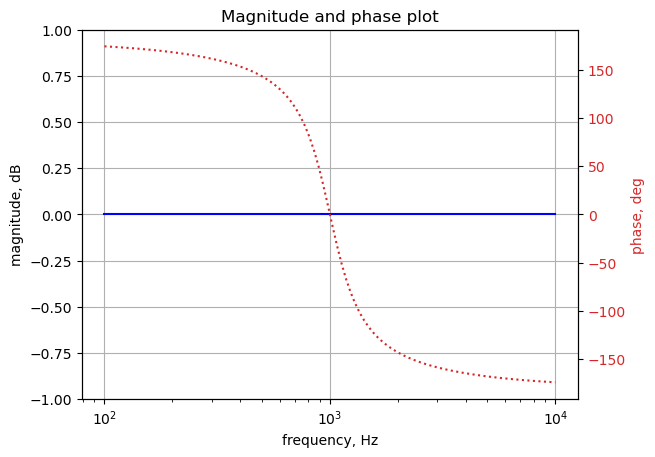

In [120]:
x = np.logspace(2, 4, 100, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

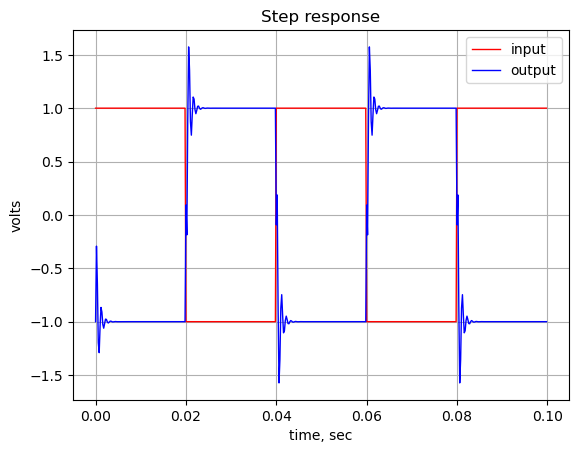

In [121]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 0.1, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Twin-T-variation 10b

### Circuit Description

![](Twin-T-variation10b.png)

In [122]:
example_net_list = '''
* Twin-T-variation10b.asc
R1 3 1 1
R2 4 5 1
R3 5 0 1
C1 5 1 1
C2 4 3 1
C3 3 0 1
V1 1 0 1
O1 6 4 2
R5 6 1 1
R6 2 6 1
'''

In [123]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# N is the variation number
U_sym = solve(NE_sym,X)
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

#| echo: false
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{- C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{6} s^{3} - R_{6} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} R_{5} + C_{1} C_{2} R_{2} R_{3} R_{5} + C_{1} C_{3} R_{1} R_{3} R_{5} - C_{2} C_{3} R_{1} R_{2} R_{6} - C_{2} C_{3} R_{1} R_{3} R_{6}\right) + s \left(C_{1} R_{3} R_{5} - C_{2} R_{1} R_{6} + C_{2} R_{2} R_{5} + C_{2} R_{3} R_{5} - C_{3} R_{1} R_{6}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{5} s^{3} + R_{5} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} R_{5} + C_{1} C_{2} R_{2} R_{3} R_{5} + C_{1} C_{3} R_{1} R_{3} R_{5} + C_{2} C_{3} R_{1} R_{2} R_{5} + C_{2} C_{3} R_{1} R_{3} R_{5}\right) + s \left(C_{1} R_{3} R_{5} + C_{2} R_{1} R_{5} + C_{2} R_{2} R_{5} + C_{2} R_{3} R_{5} + C_{3} R_{1} R_{5}\right)}$

Making the substitutions:

{R1:R,R3:R,R5:R,R6:R, C1:C, C3:C}


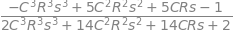

In [124]:
H_sym_reduced = H_sym.subs({R1:R, R2:R/2, R3:R, C1:C, C2:2*C, C3:C, R5:2, R6:1})
H_sym_reduced

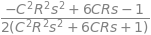

In [125]:
H_sym_reduced.simplify().collect(s)

In [126]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced,s) #returns numerator and denominator

In [127]:
H_sym_num

In [128]:
H_sym_num.factor(s)

In [129]:
H_sym_denom

In [130]:
H_sym_denom.factor(s)

In [131]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced.simplify().collect(s),s) #returns numerator and denominator

In [132]:
solve(H_sym_num, s)

In [133]:
solve(H_sym_denom, s)

In [134]:
H_num, H_denom = fraction(H_sym_reduced.subs({R:1e3,C:1e-6}))

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

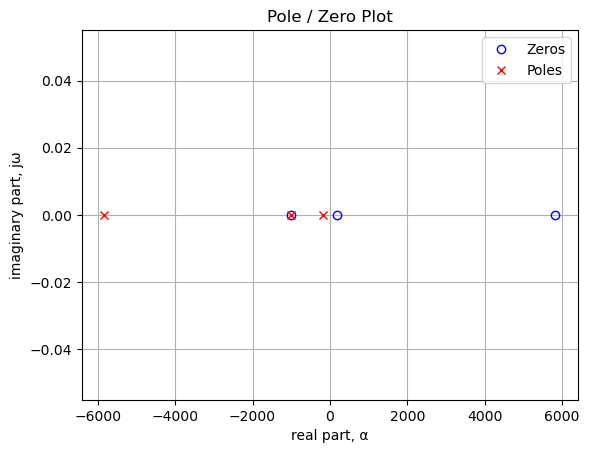

In [135]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [136]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
5828.43         -5828.43
-1000           -1000
171.57          -171.57


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

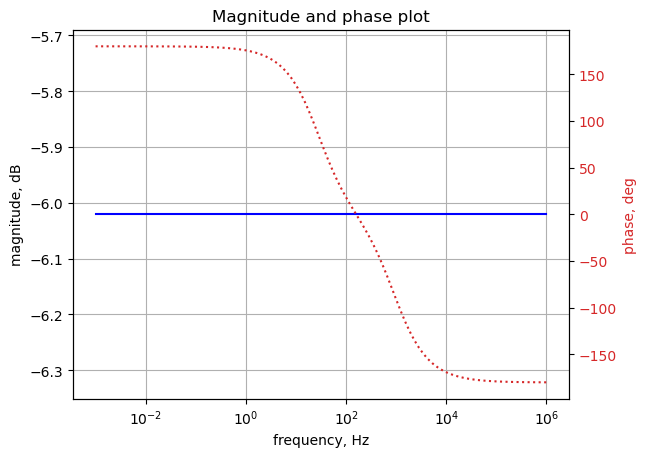

In [137]:
x = np.logspace(-3, 6, 100, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

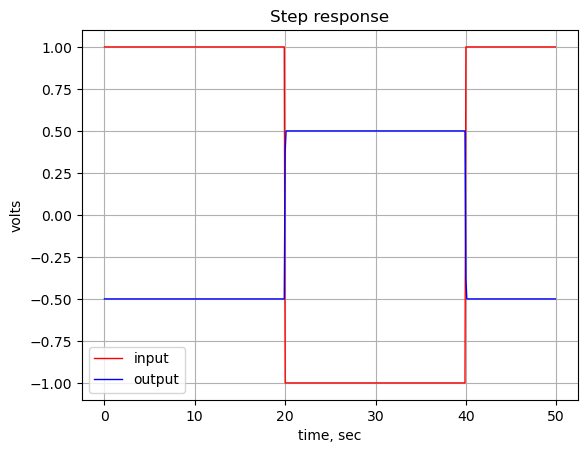

In [138]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()